# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from scipy import stats
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | anadyr
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | lesosibirsk
Processing Record 4 of Set 1 | taiohae
City not found. Skipping...
Processing Record 5 of Set 1 | hayma'
City not found. Skipping...
Processing Record 6 of Set 1 | west island
Processing Record 7 of Set 1 | bayana
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | bereznik
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | qamdo
Processing Record 12 of Set 1 | hawaiian paradise park
Processing Record 13 of Set 1 | nadvirna
Processing Record 14 of Set 1 | ust-nera
Processing Record 15 of Set 1 | invercargill
Processing Record 16 of Set 1 | papatowai
Processing Record 17 of Set 1 | olyokminsk
Processing Record 18 of Set 1 | stanley
Processing Record 19 of Set 1 | iqaluit
Processing Record 20 of Set 1 | bilibino
Processing Record 21 of Set 1 | edinburgh of the seven seas

Processing Record 39 of Set 4 | coronel suarez
Processing Record 40 of Set 4 | oistins
Processing Record 41 of Set 4 | calella
Processing Record 42 of Set 4 | zemio
Processing Record 43 of Set 4 | vilyuchinsk
Processing Record 44 of Set 4 | nemuro
Processing Record 45 of Set 4 | egilsstadir
Processing Record 46 of Set 4 | holualoa
Processing Record 47 of Set 4 | wickenburg
Processing Record 48 of Set 4 | jayapura
Processing Record 49 of Set 4 | toga village
City not found. Skipping...
Processing Record 0 of Set 5 | novodvinsk
Processing Record 1 of Set 5 | middlesboro
Processing Record 2 of Set 5 | scottburgh
Processing Record 3 of Set 5 | pibor
City not found. Skipping...
Processing Record 4 of Set 5 | aba
Processing Record 5 of Set 5 | lossiemouth
Processing Record 6 of Set 5 | leava
Processing Record 7 of Set 5 | naze
Processing Record 8 of Set 5 | sittwe
Processing Record 9 of Set 5 | tanabi
Processing Record 10 of Set 5 | yarkovo
Processing Record 11 of Set 5 | la'ie
Processing Re

Processing Record 31 of Set 8 | dul'durga
Processing Record 32 of Set 8 | takamatsu
Processing Record 33 of Set 8 | angaur state
Processing Record 34 of Set 8 | praia da vitoria
Processing Record 35 of Set 8 | teguise
Processing Record 36 of Set 8 | ekibastuz
Processing Record 37 of Set 8 | kargopol'
Processing Record 38 of Set 8 | izki
Processing Record 39 of Set 8 | znamenskoye
Processing Record 40 of Set 8 | shimoda
Processing Record 41 of Set 8 | wabag
Processing Record 42 of Set 8 | alaghsas
Processing Record 43 of Set 8 | usinsk
Processing Record 44 of Set 8 | ulanhot
Processing Record 45 of Set 8 | bir el ater
Processing Record 46 of Set 8 | benghazi
Processing Record 47 of Set 8 | karratha
Processing Record 48 of Set 8 | camarinas
Processing Record 49 of Set 8 | saint-francois
Processing Record 0 of Set 9 | tahe
Processing Record 1 of Set 9 | mitchell
Processing Record 2 of Set 9 | marsabit
Processing Record 3 of Set 9 | revda
Processing Record 4 of Set 9 | tamanrasset
Processi

Processing Record 21 of Set 12 | colares
Processing Record 22 of Set 12 | bryukhovetskaya
Processing Record 23 of Set 12 | oamaru
Processing Record 24 of Set 12 | castelli
Processing Record 25 of Set 12 | imola
Processing Record 26 of Set 12 | kushiro
Processing Record 27 of Set 12 | hassa
Processing Record 28 of Set 12 | shelton
Processing Record 29 of Set 12 | balikpapan
Processing Record 30 of Set 12 | soto la marina
Processing Record 31 of Set 12 | umluj
Processing Record 32 of Set 12 | campina verde
Processing Record 33 of Set 12 | zhangye
Processing Record 34 of Set 12 | valparaiso
Processing Record 35 of Set 12 | madinat ash shamal
Processing Record 36 of Set 12 | cadale
Processing Record 37 of Set 12 | vilhena
Processing Record 38 of Set 12 | solwezi
Processing Record 39 of Set 12 | amasra
Processing Record 40 of Set 12 | gueltat zemmour
City not found. Skipping...
Processing Record 41 of Set 12 | lankow
Processing Record 42 of Set 12 | turbat
Processing Record 43 of Set 12 | b

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame (city_data)

# Show Record Count
city_data_df.count()

City          582
Lat           582
Lng           582
Max Temp      582
Humidity      582
Cloudiness    582
Wind Speed    582
Country       582
Date          582
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,anadyr,64.7500,177.4833,2.28,100,75,5.00,RU,1698223076
1,avarua,-21.2078,-159.7750,21.03,56,75,1.54,CK,1698223013
2,lesosibirsk,58.2358,92.4828,1.62,97,100,4.25,RU,1698223078
3,west island,-12.1568,96.8225,28.99,70,40,6.69,CC,1698222994
4,bayana,26.9000,77.2833,31.72,20,0,4.26,IN,1698223082


In [19]:
# Export the City_Data into a csv
#city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

renamed_city_data_df = city_data_df.rename(columns={'Lat': 'Lat(°)',
                                            'Lng': 'Lng (°)',
                                            'Max Temp': 'Max Temp (°C)',
                                            'Humidity': 'Humidity (%)',
                                            'Cloudiness': 'Cloudiness (%)',
                                            'Wind Speed': 'Wind Speed (m/s)'})
renamed_city_data_df.head()

,City,Lat(°),Lng (°),Max Temp (°C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,2.28,100,75,5.00,RU,1698223076
1,avarua,-21.2078,-159.7750,21.03,56,75,1.54,CK,1698223013
2,lesosibirsk,58.2358,92.4828,1.62,97,100,4.25,RU,1698223078
3,west island,-12.1568,96.8225,28.99,70,40,6.69,CC,1698222994
4,bayana,26.9000,77.2833,31.72,20,0,4.26,IN,1698223082


In [21]:
# Read saved data
renamed_city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
renamed_city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,2.28,100,75,5.00,RU,1698223076
1,avarua,-21.2078,-159.7750,21.03,56,75,1.54,CK,1698223013
2,lesosibirsk,58.2358,92.4828,1.62,97,100,4.25,RU,1698223078
3,west island,-12.1568,96.8225,28.99,70,40,6.69,CC,1698222994
4,bayana,26.9000,77.2833,31.72,20,0,4.26,IN,1698223082


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

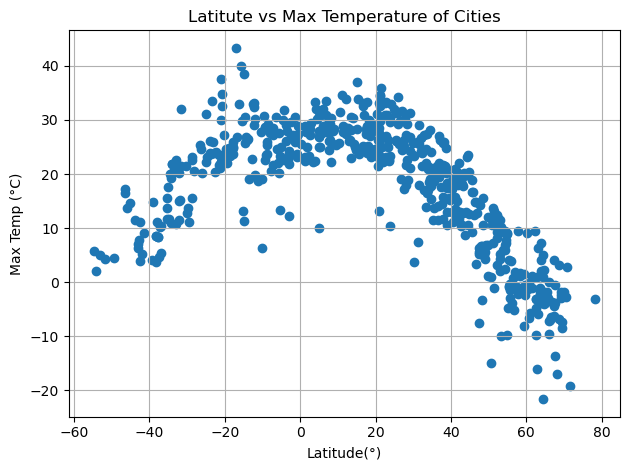

In [24]:
 # Create a Scatter Plot for temperature vs latitude
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude(°)')
plt.ylabel('Max Temp (°C)')
plt.title ("Latitute vs Max Temperature of Cities")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig1.png")

plt.show()

#### Latitude Vs. Humidity

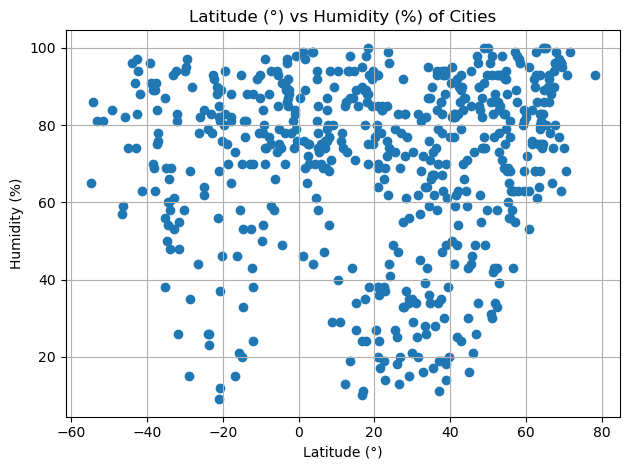

In [26]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude (°)')
plt.ylabel('Humidity (%)')
plt.title ("Latitude (°) vs Humidity (%) of Cities")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig2.png")

plt.show()

#### Latitude Vs. Cloudiness

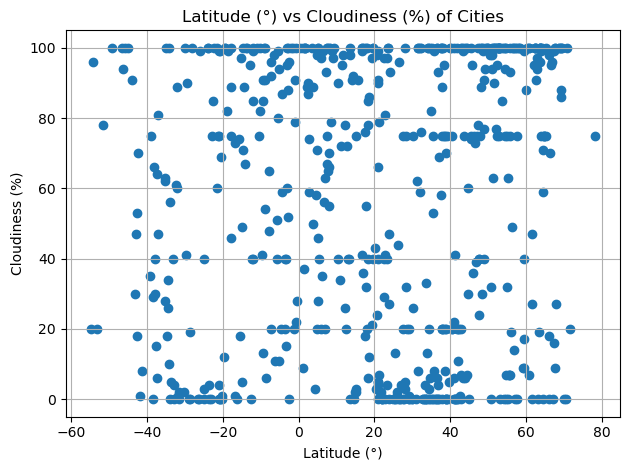

In [28]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude (°)')
plt.ylabel('Cloudiness (%)')
plt.title ("Latitude (°) vs Cloudiness (%) of Cities")
plt.grid()
plt.tight_layout()


# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

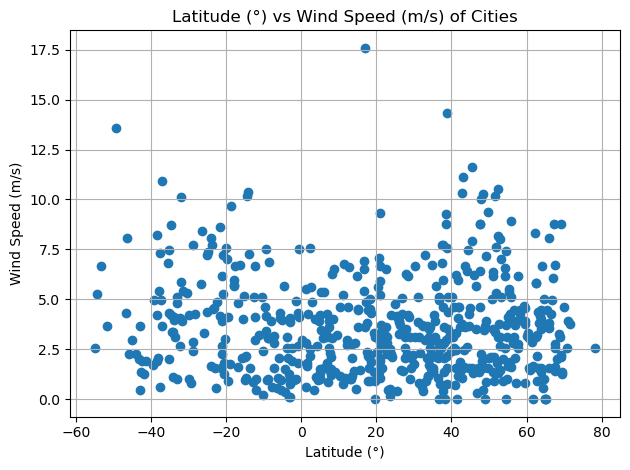

In [31]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude (°)')
plt.ylabel('Wind Speed (m/s)')
plt.title ("Latitude (°) vs Wind Speed (m/s) of Cities")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [32]:
# Define a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

In [34]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,anadyr,64.7500,177.4833,2.28,100,75,5.00,RU,1698223076
2,lesosibirsk,58.2358,92.4828,1.62,97,100,4.25,RU,1698223078
4,bayana,26.9000,77.2833,31.72,20,0,4.26,IN,1698223082
5,ilulissat,69.2167,-51.1000,-2.99,63,100,8.75,GL,1698223083
6,bereznik,62.8551,42.7072,0.96,61,94,2.14,RU,1698223084


In [35]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,avarua,-21.2078,-159.7750,21.03,56,75,1.54,CK,1698223013
3,west island,-12.1568,96.8225,28.99,70,40,6.69,CC,1698222994
7,waitangi,-43.9535,-176.5597,11.57,96,91,2.24,NZ,1698223085
12,invercargill,-46.4000,168.3500,17.23,59,94,8.05,NZ,1698223002
13,papatowai,-46.5619,169.4708,16.43,57,100,4.32,NZ,1698223092


###  Temperature vs. Latitude Linear Regression Plot

In [50]:
# Linear regression on Northern Hemisphere

north_tl_x_values = northern_hemi_df ['Lat']
north_tl_y_values = northern_hemi_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_tl_x_values, north_tl_y_values)

# Get regression values
north_tl_regress_values = north_tl_x_values * slope + intercept

print(north_tl_regress_values)

City_ID
0      -0.111207
2       3.576151
4      21.313758
5      -2.639580
6       0.961399
         ...    
576    20.965128
577    33.783880
578    15.700643
580    35.522387
581     7.704065
Name: Lat, Length: 418, dtype: float64


In [51]:
# Create line equation string
north_tl_line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(north_tl_line_eq)


y = -0.57x +36.54


The r-value is: 0.029662339779378665


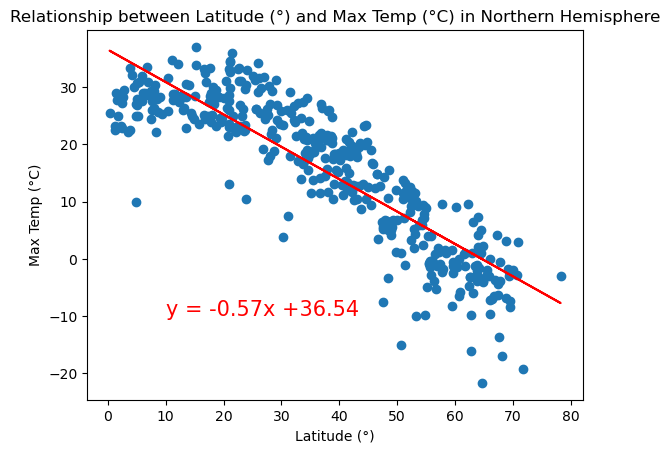

In [64]:
# Create Plot
plt.scatter(north_tl_x_values, north_tl_y_values)
plt.plot(north_tl_x_values,north_tl_regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude (°)')
plt.ylabel('Max Temp (°C)')
plt.title ('Relationship between Latitude (°) and Max Temp (°C) in Northern Hemisphere')
plt.annotate(north_tl_line_eq,(10,-10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show() 

In [39]:
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,avarua,-21.2078,-159.7750,21.03,56,75,1.54,CK,1698223013
3,west island,-12.1568,96.8225,28.99,70,40,6.69,CC,1698222994
7,waitangi,-43.9535,-176.5597,11.57,96,91,2.24,NZ,1698223085
12,invercargill,-46.4000,168.3500,17.23,59,94,8.05,NZ,1698223002
13,papatowai,-46.5619,169.4708,16.43,57,100,4.32,NZ,1698223092


In [53]:
# Linear regression on Southern Hemisphere
south_tl_x_values = southern_hemi_df['Lat']
south_tl_y_values = southern_hemi_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_tl_x_values, south_tl_y_values)

# Get regression values
south_tl_regress_values = south_tl_x_values * slope + intercept

print(south_tl_regress_values)

City_ID
1      21.289278
3      24.960333
7      12.063700
12     11.071408
13     11.005742
         ...    
562    21.967517
564    16.490462
567    24.723546
568    24.955466
579    12.908882
Name: Lat, Length: 164, dtype: float64


In [54]:
# Create line equation string
south_tl_line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(south_tl_line_eq)


y = 0.41x +29.89


The r-value is: 0.029662339779378665


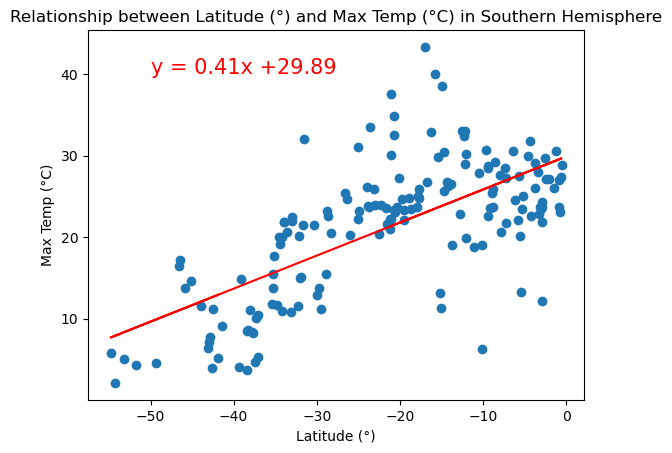

In [65]:
# Create Plot
plt.scatter(south_tl_x_values, south_tl_y_values)

plt.plot(south_tl_x_values,south_tl_regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude (°)')
plt.ylabel('Max Temp (°C)')
plt.title ('Relationship between Latitude (°) and Max Temp (°C) in Southern Hemisphere')
plt.annotate(south_tl_line_eq,(-50,40),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show() 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In the northern hemisphere has a negative correlation between the latitude and the max temperature of cities. As the latitude percentage increases, the max temperature of the city is seen to decrease. 
The opposite falls true for the southern hemisphere, where as the latitude increases, the max temperature is seen to increase.

### Humidity vs. Latitude Linear Regression Plot

In [58]:
# Northern Hemisphere
north_hl_x_values = northern_hemi_df ['Lat']
north_hl_y_values = northern_hemi_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_hl_x_values, north_hl_y_values)

# Get regression values
north_hl_regress_values = north_hl_x_values * slope + intercept

print(north_hl_regress_values)

City_ID
0      74.958797
2      73.576320
4      66.926074
5      75.906744
6      74.556652
         ...    
576    67.056784
577    62.250732
578    69.030563
580    61.598925
581    72.028668
Name: Lat, Length: 418, dtype: float64


In [59]:
# Create line equation string
north_hl_line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(north_hl_line_eq)

y = 0.21x +61.22


The r-value is: 0.029662339779378665


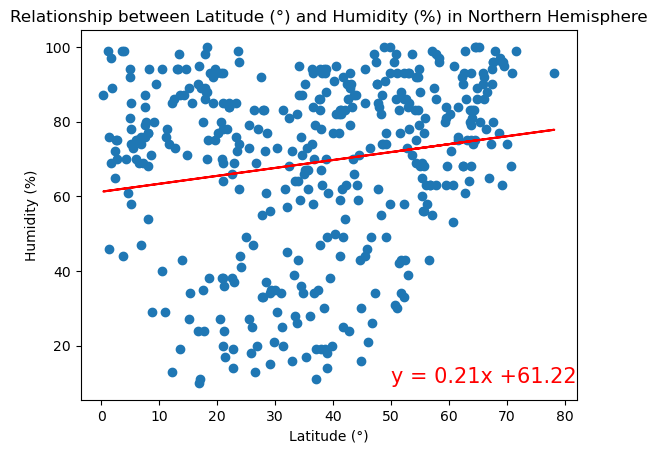

In [66]:
# Create Plot
plt.scatter(north_hl_x_values, north_hl_y_values)
plt.plot(north_hl_x_values,north_hl_regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude (°)')
plt.ylabel('Humidity (%)')
plt.title ('Relationship between Latitude (°) and Humidity (%) in Northern Hemisphere')
plt.annotate(north_hl_line_eq,(50,10),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show() 

In [67]:
# Southern Hemisphere
south_hl_x_values = southern_hemi_df['Lat']
south_hl_y_values = southern_hemi_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_hl_x_values, south_tl_y_values)

# Get regression values
south_hl_regress_values = south_hl_x_values * slope + intercept

print(south_hl_regress_values)

City_ID
1      21.289278
3      24.960333
7      12.063700
12     11.071408
13     11.005742
         ...    
562    21.967517
564    16.490462
567    24.723546
568    24.955466
579    12.908882
Name: Lat, Length: 164, dtype: float64


In [68]:
# Create line equation string
south_hl_line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(south_hl_line_eq)


y = 0.41x +29.89


The r-value is: 0.4600997367126088


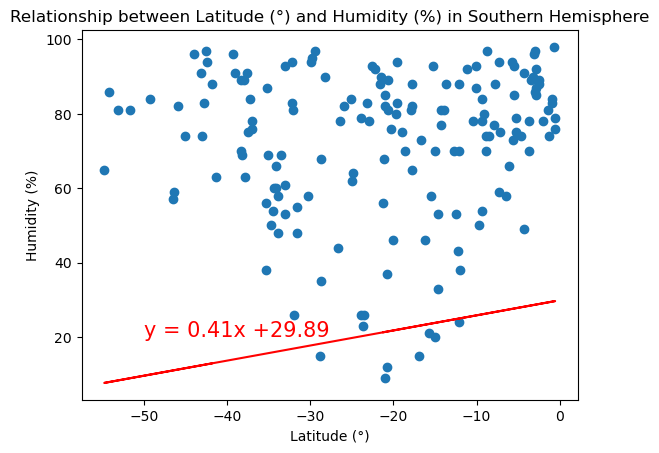

In [70]:
# Create Plot
plt.scatter(south_hl_x_values, south_hl_y_values)
plt.plot(south_hl_x_values,south_hl_regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude (°)')
plt.ylabel('Humidity (%)')
plt.title ('Relationship between Latitude (°) and Humidity (%) in Southern Hemisphere')
plt.annotate(south_hl_line_eq,(-50,20),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show() 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

A weak positive correlatin exists between the latitude and humidity levels. In the northern hemisphere, as the latitude increases, less cities would have low humidities. Same is true for the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

In [74]:
# Northern Hemisphere
north_cl_x_values = northern_hemi_df ['Lat']
north_cl_y_values = northern_hemi_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_cl_x_values, north_cl_y_values)

# Get regression values
north_cl_regress_values = north_cl_x_values * slope + intercept

print(north_cl_regress_values)

City_ID
0      61.813682
2      60.482013
4      54.076175
5      62.726789
6      61.426316
         ...    
576    54.202081
577    49.572660
578    56.103320
580    48.944808
581    58.991240
Name: Lat, Length: 418, dtype: float64


In [75]:
# Create line equation string
north_cl_line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(north_cl_line_eq)

y = 0.2x +48.58


The r-value is: 0.009446911461322819


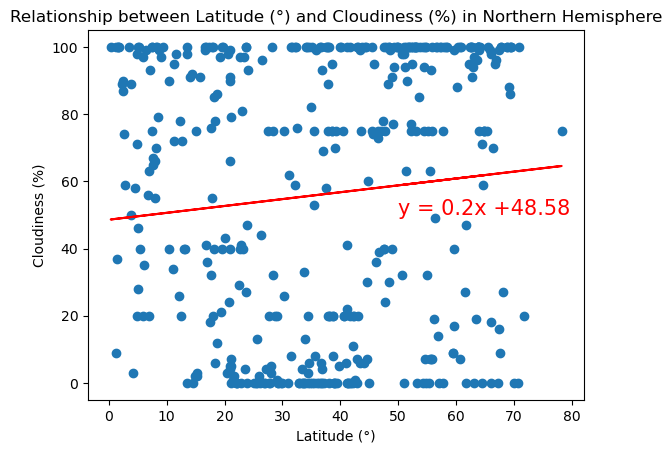

In [77]:
# Create Plot
plt.scatter(north_cl_x_values, north_cl_y_values)
plt.plot(north_cl_x_values,north_cl_regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude (°)')
plt.ylabel('Cloudiness (%)')
plt.title ('Relationship between Latitude (°) and Cloudiness (%) in Northern Hemisphere')
plt.annotate(north_cl_line_eq,(50,50),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show() 

In [78]:
# Southern Hemisphere
south_cl_x_values = southern_hemi_df['Lat']
south_cl_y_values = southern_hemi_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_cl_x_values, south_cl_y_values)

# Get regression values
south_cl_regress_values = south_cl_x_values * slope + intercept

print(south_cl_regress_values)

City_ID
1      54.850179
3      58.988076
7      44.451398
12     43.332917
13     43.258900
         ...    
562    55.614668
564    49.441105
567    58.721177
568    58.982590
579    45.404060
Name: Lat, Length: 164, dtype: float64


In [79]:
# Create line equation string
south_cl_line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(south_cl_line_eq)

y = 0.46x +64.55


The r-value is: 0.02857723224081013


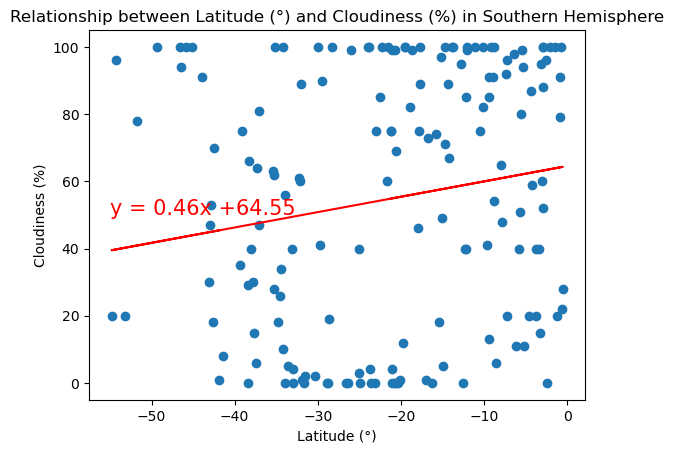

In [83]:
# Create Plot
plt.scatter(south_cl_x_values, south_cl_y_values)
plt.plot(south_cl_x_values,south_cl_regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude (°)')
plt.ylabel('Cloudiness (%)')
plt.title ('Relationship between Latitude (°) and Cloudiness (%) in Southern Hemisphere')
plt.annotate(south_cl_line_eq,(-55,50),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show() 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

Very weak correlation exists between latitude and cloudiness where as latitude increases, the percentage of cloudiness is observed to increase also in both southern and northern hemispheres.


### Wind Speed vs. Latitude Linear Regression Plot

In [85]:
# Northern Hemisphere
north_wl_x_values = northern_hemi_df ['Lat']
north_wl_y_values = northern_hemi_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(north_wl_x_values, north_wl_y_values)

# Get regression values
north_wl_regress_values = north_wl_x_values * slope + intercept

print(north_wl_regress_values)

City_ID
0      3.765028
2      3.696816
4      3.368690
5      3.811800
6      3.745186
         ...   
576    3.375140
577    3.138007
578    3.472527
580    3.105847
581    3.620454
Name: Lat, Length: 418, dtype: float64


In [86]:
# Create line equation string
north_wl_line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(north_wl_line_eq)

y = 0.01x +3.09


The r-value is: 0.007007837953254686


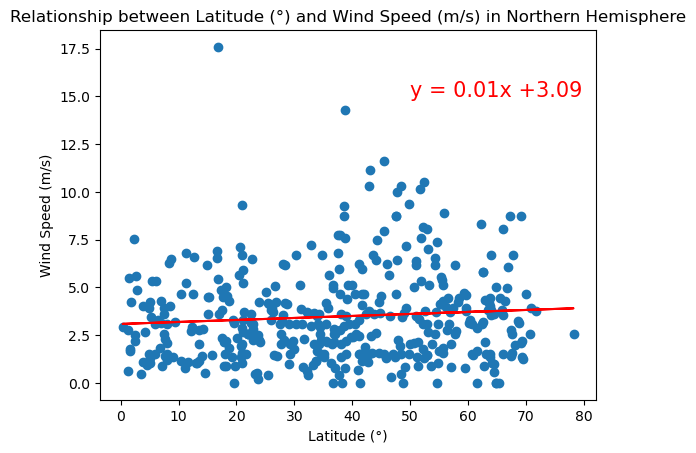

In [88]:
# Create Plot
plt.scatter(north_wl_x_values, north_wl_y_values)
plt.plot(north_wl_x_values,north_wl_regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude (°)')
plt.ylabel('Wind Speed (m/s)')
plt.title ('Relationship between Latitude (°) and Wind Speed (m/s) in Northern Hemisphere')
plt.annotate(north_wl_line_eq,(50,15),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show() 

In [89]:
# Southern Hemisphere
south_wl_x_values = southern_hemi_df['Lat']
south_wl_y_values = southern_hemi_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(south_wl_x_values, south_wl_y_values)

# Get regression values
south_wl_regress_values = south_wl_x_values * slope + intercept

print(south_wl_regress_values)

City_ID
1      3.841032
3      3.468217
7      4.777939
12     4.878712
13     4.885381
         ...   
562    3.772153
564    4.328378
567    3.492264
568    3.468711
579    4.692106
Name: Lat, Length: 164, dtype: float64


In [90]:
# Create line equation string
south_wl_line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
print(south_wl_line_eq)

y = -0.04x +2.97


The r-value is: 0.049561355815391575


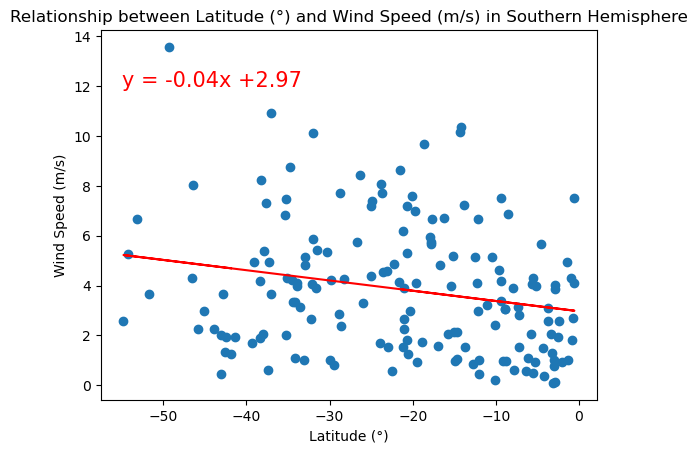

In [92]:
# Create Plot
plt.scatter(south_wl_x_values, south_wl_y_values)
plt.plot(south_wl_x_values,south_wl_regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude (°)')
plt.ylabel('Wind Speed (m/s)')
plt.title ('Relationship between Latitude (°) and Wind Speed (m/s) in Southern Hemisphere')
plt.annotate(south_wl_line_eq,(-55,12),fontsize=15,color="red")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show() 

**Discussion about the linear relationship:** YOUR RESPONSE HERE

The correlation between wind speed and latitude is very weak for both northern and southern hemispheres. 
The northern hemisphere has a very weak positive correlation where as latitute increases, the wind speed increases slightly where as southern has the opposite; increase in latitude leads to slight decrease in wind speed.
